In [2]:
import os
import sys
import math


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from keras.callbacks import *
from imblearn.over_sampling import RandomOverSampler 
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import *

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report

import warnings
warnings.filterwarnings('ignore')

metadata = (r"c:\Users\USER\Desktop\Carcinoma basocelular\HAM10000\HAM10000_metadata.csv")
hmnist_8_8_RGB = (r"c:\Users\USER\Desktop\Carcinoma basocelular\HAM10000\hmnist_8_8_RGB.csv")
hmnist_28_28_RGB = (r"c:\Users\USER\Desktop\Carcinoma basocelular\HAM10000\hmnist_28_28_RGB.csv")
hmnist_8_8_L = (r"c:\Users\USER\Desktop\Carcinoma basocelular\HAM10000\hmnist_8_8_L.csv")
hmnist_28_28_L = (r"c:\Users\USER\Desktop\Carcinoma basocelular\HAM10000\hmnist_28_28_L.csv")


classes = {4: ('nv', ' melanocytic nevi'),
           6: ('mel', 'melanoma'),
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'),
           5: ('vasc', ' pyogenic granulomas and hemorrhage'),
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
           3: ('df', 'dermatofibroma')}

In [3]:
df = pd.read_csv(r"c:\Users\USER\Desktop\Carcinoma basocelular\HAM10000\hmnist_28_28_RGB.csv", delimiter=',')
df.dataframeName = (r"c:\Users\USER\Desktop\Carcinoma basocelular\HAM10000\hmnist_28_28_RGB.csv")
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10015 rows and 2353 columns


In [4]:
df.head()

label = df["label"]
data = df.drop(columns=["label"]) 
data.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2342  pixel2343  \
0        197        154        185        202  ...        134        173   
1        123         93        126        158  ...         82         60   
2        201        142        160        206  ...        149        167   
3        143        103        119        171  ...         73         44   
4        215        162        191        225  ...        201        209   

   pixel2344  pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  \
0        124        138        183        147        166        185   
1         39         55         25         14         28         25   
2        129        143        159        124        142        136   
3         26         36         25         12         17         25   
4        166        185        172        135        149        109   

   pixel2350  pixel2351  
0        154        177  
1         14         27  
2        104        117  
3         12         15  
4         78         92  

[5 rows x 2352 columns]

In [5]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number])
    df = df.dropna(axis=1)
    df = df[[col for col in df if df[col].nunique() > 1]]
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

False
label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64


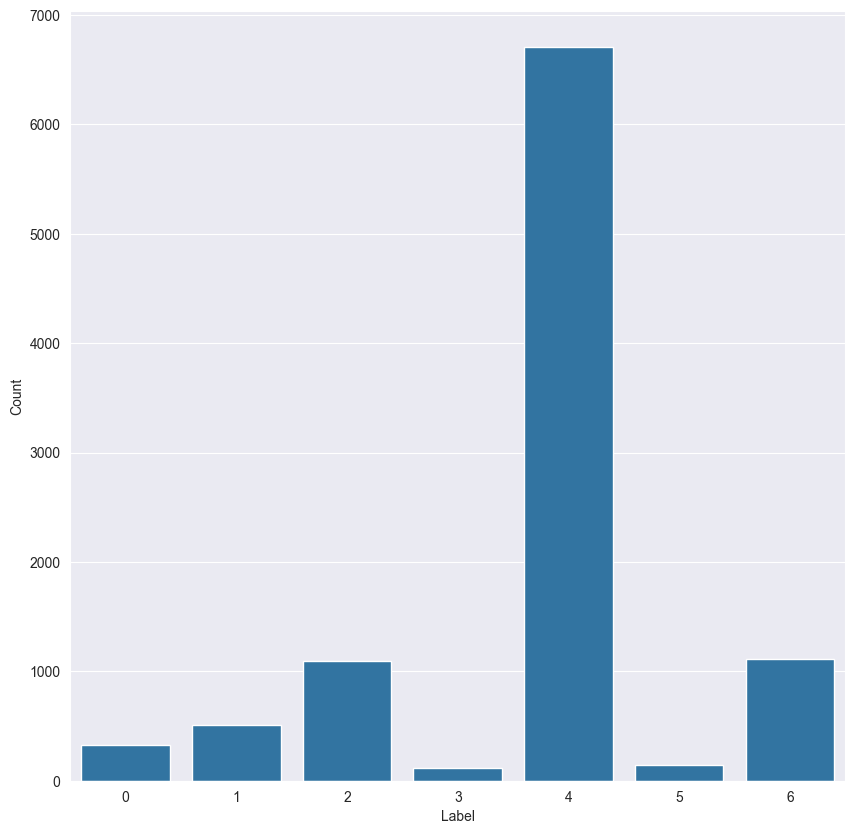

In [6]:
# plotting the labeled data 
print(label.isna().all())
print(label.value_counts())
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(x=label.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# CODIGO INICIAL ORIGINAL ----------------------------------------------
# plotting the labeled data 
#plt.figure(figsize = (10,10))
#sns.set_style("darkgrid")
#sns.countplot(label)

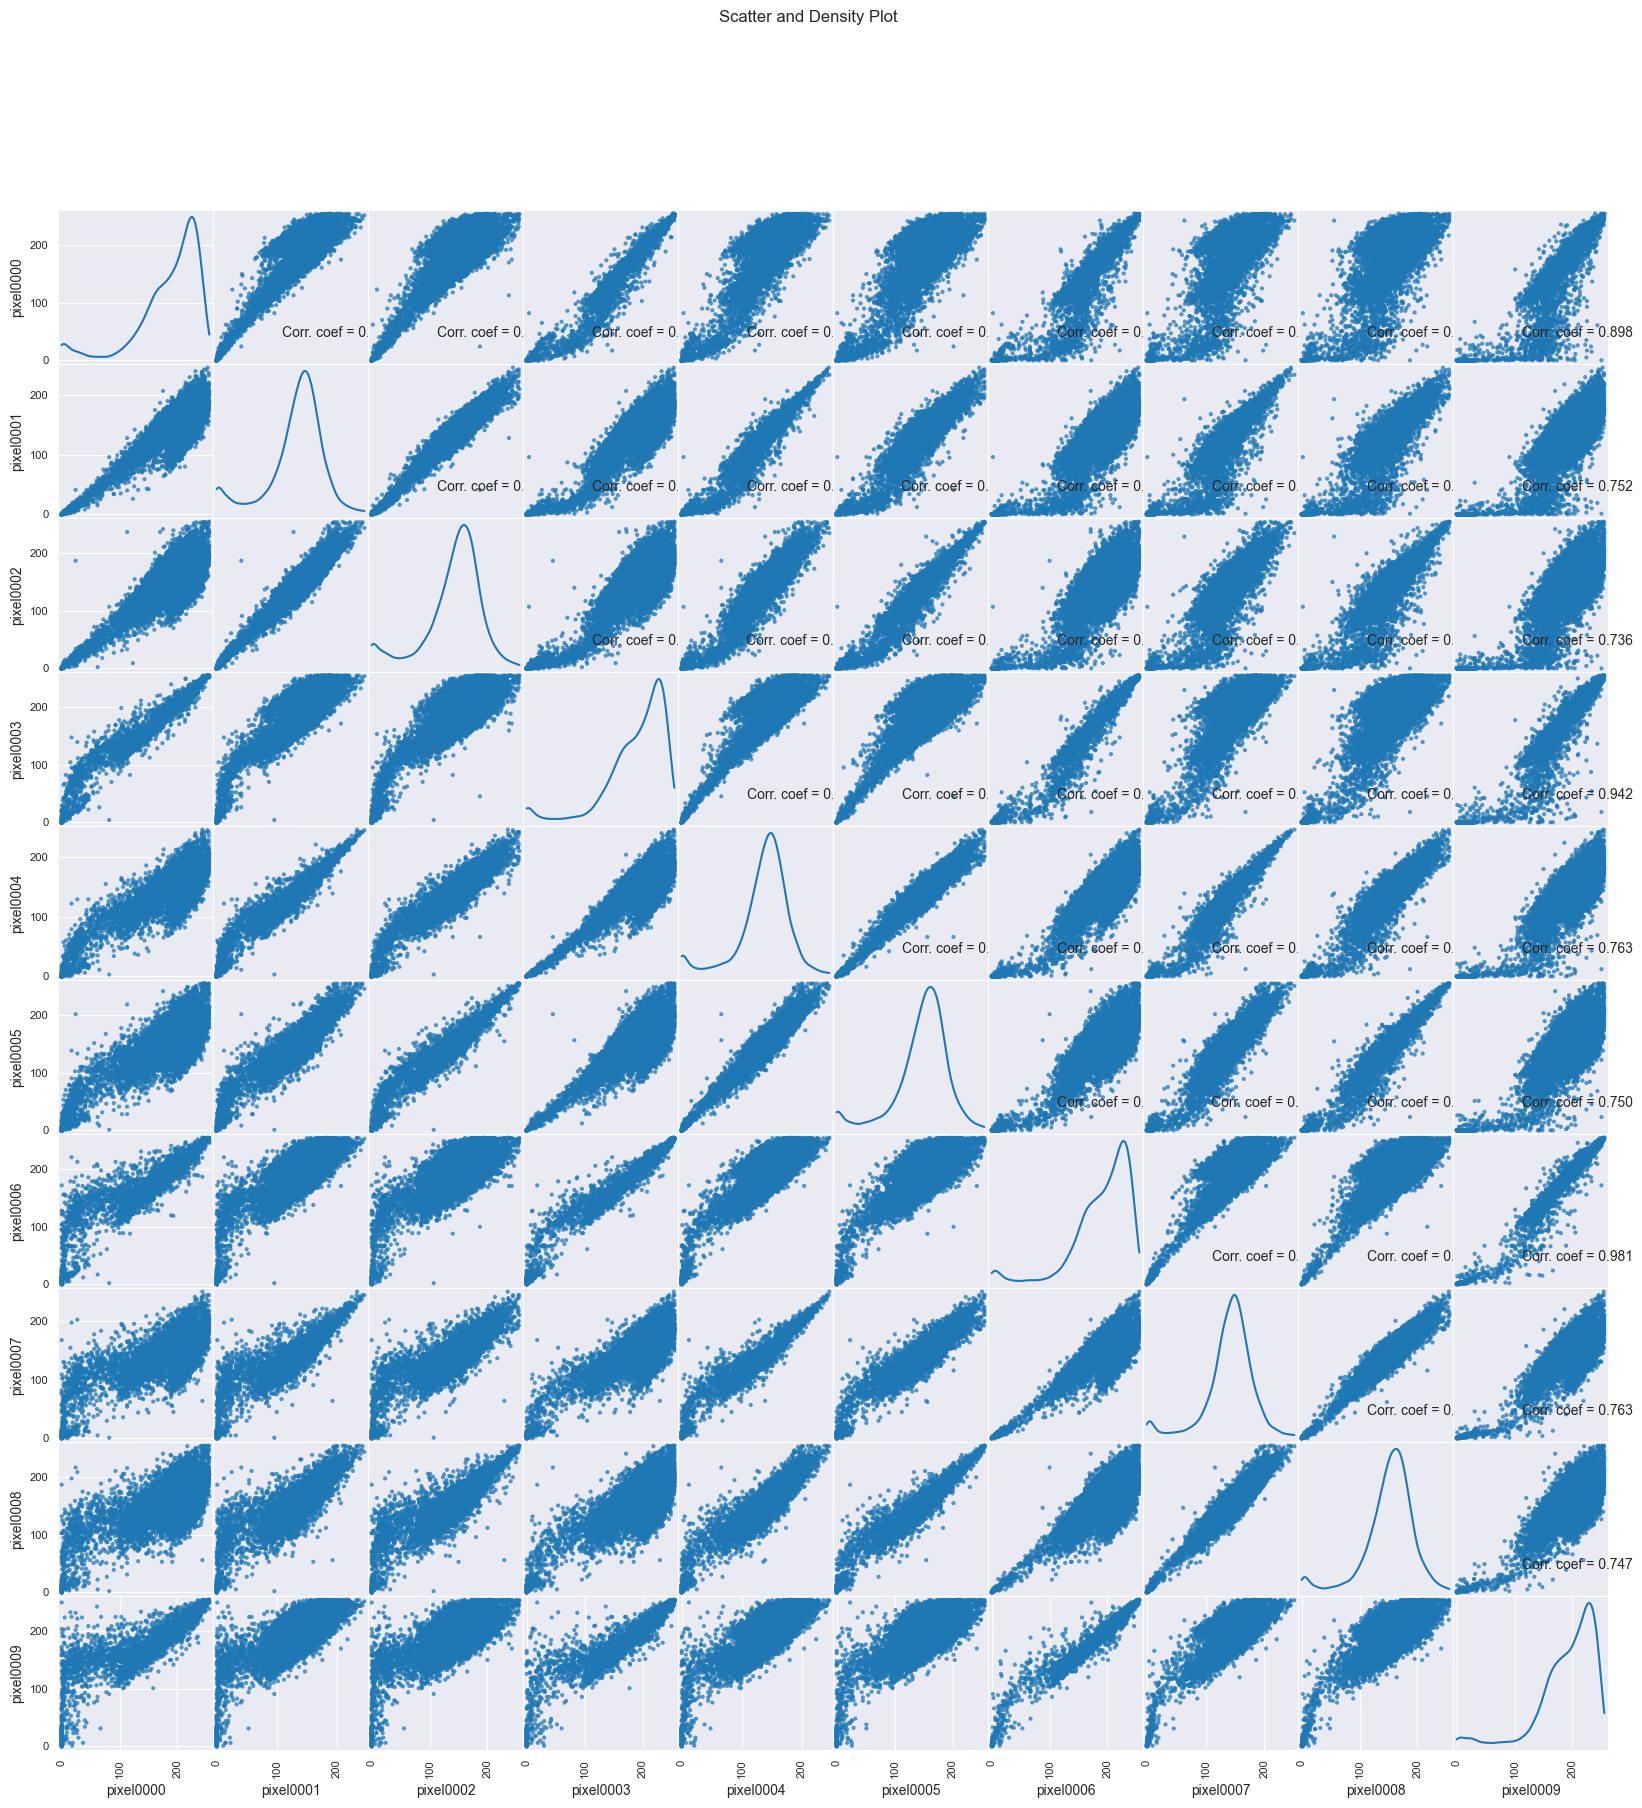

In [7]:
plotScatterMatrix(df, 20, 10)

In [8]:
# our dataset is immbalanced, so we try to balanced the data using oversample the data using random points
oversample = RandomOverSampler()
data,label  = oversample.fit_resample(data,label)
data = np.array(data).reshape(-1,28,28,3)
label = np.array(label)
print(type(label))
data.shape

<class 'numpy.ndarray'>


(46935, 28, 28, 3)

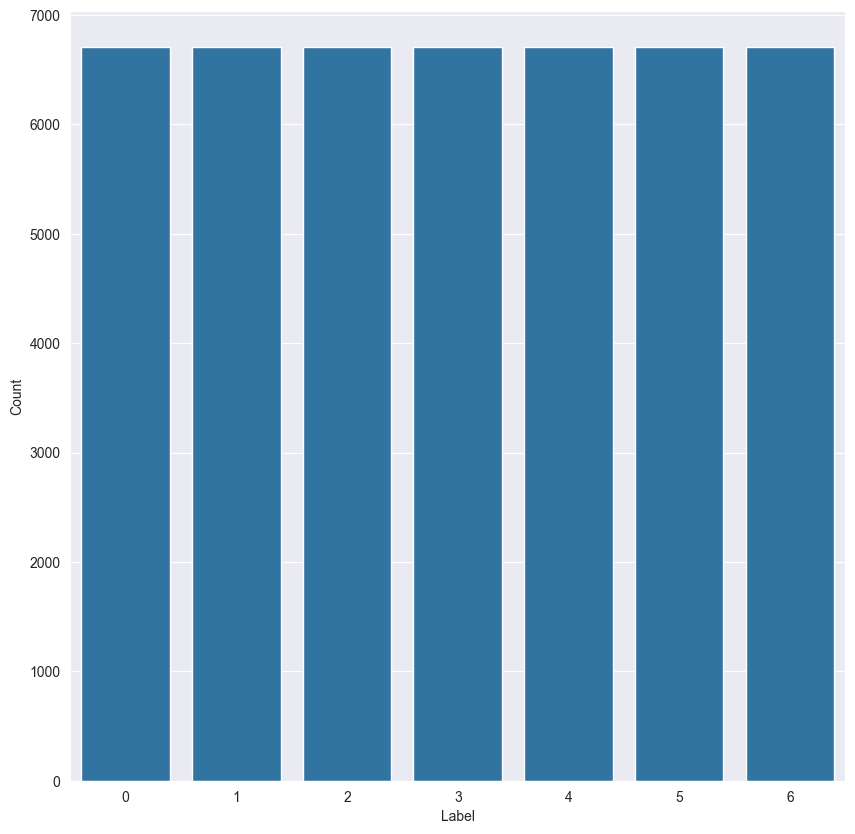

In [9]:
# plotting the labeled data 
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(x=label)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

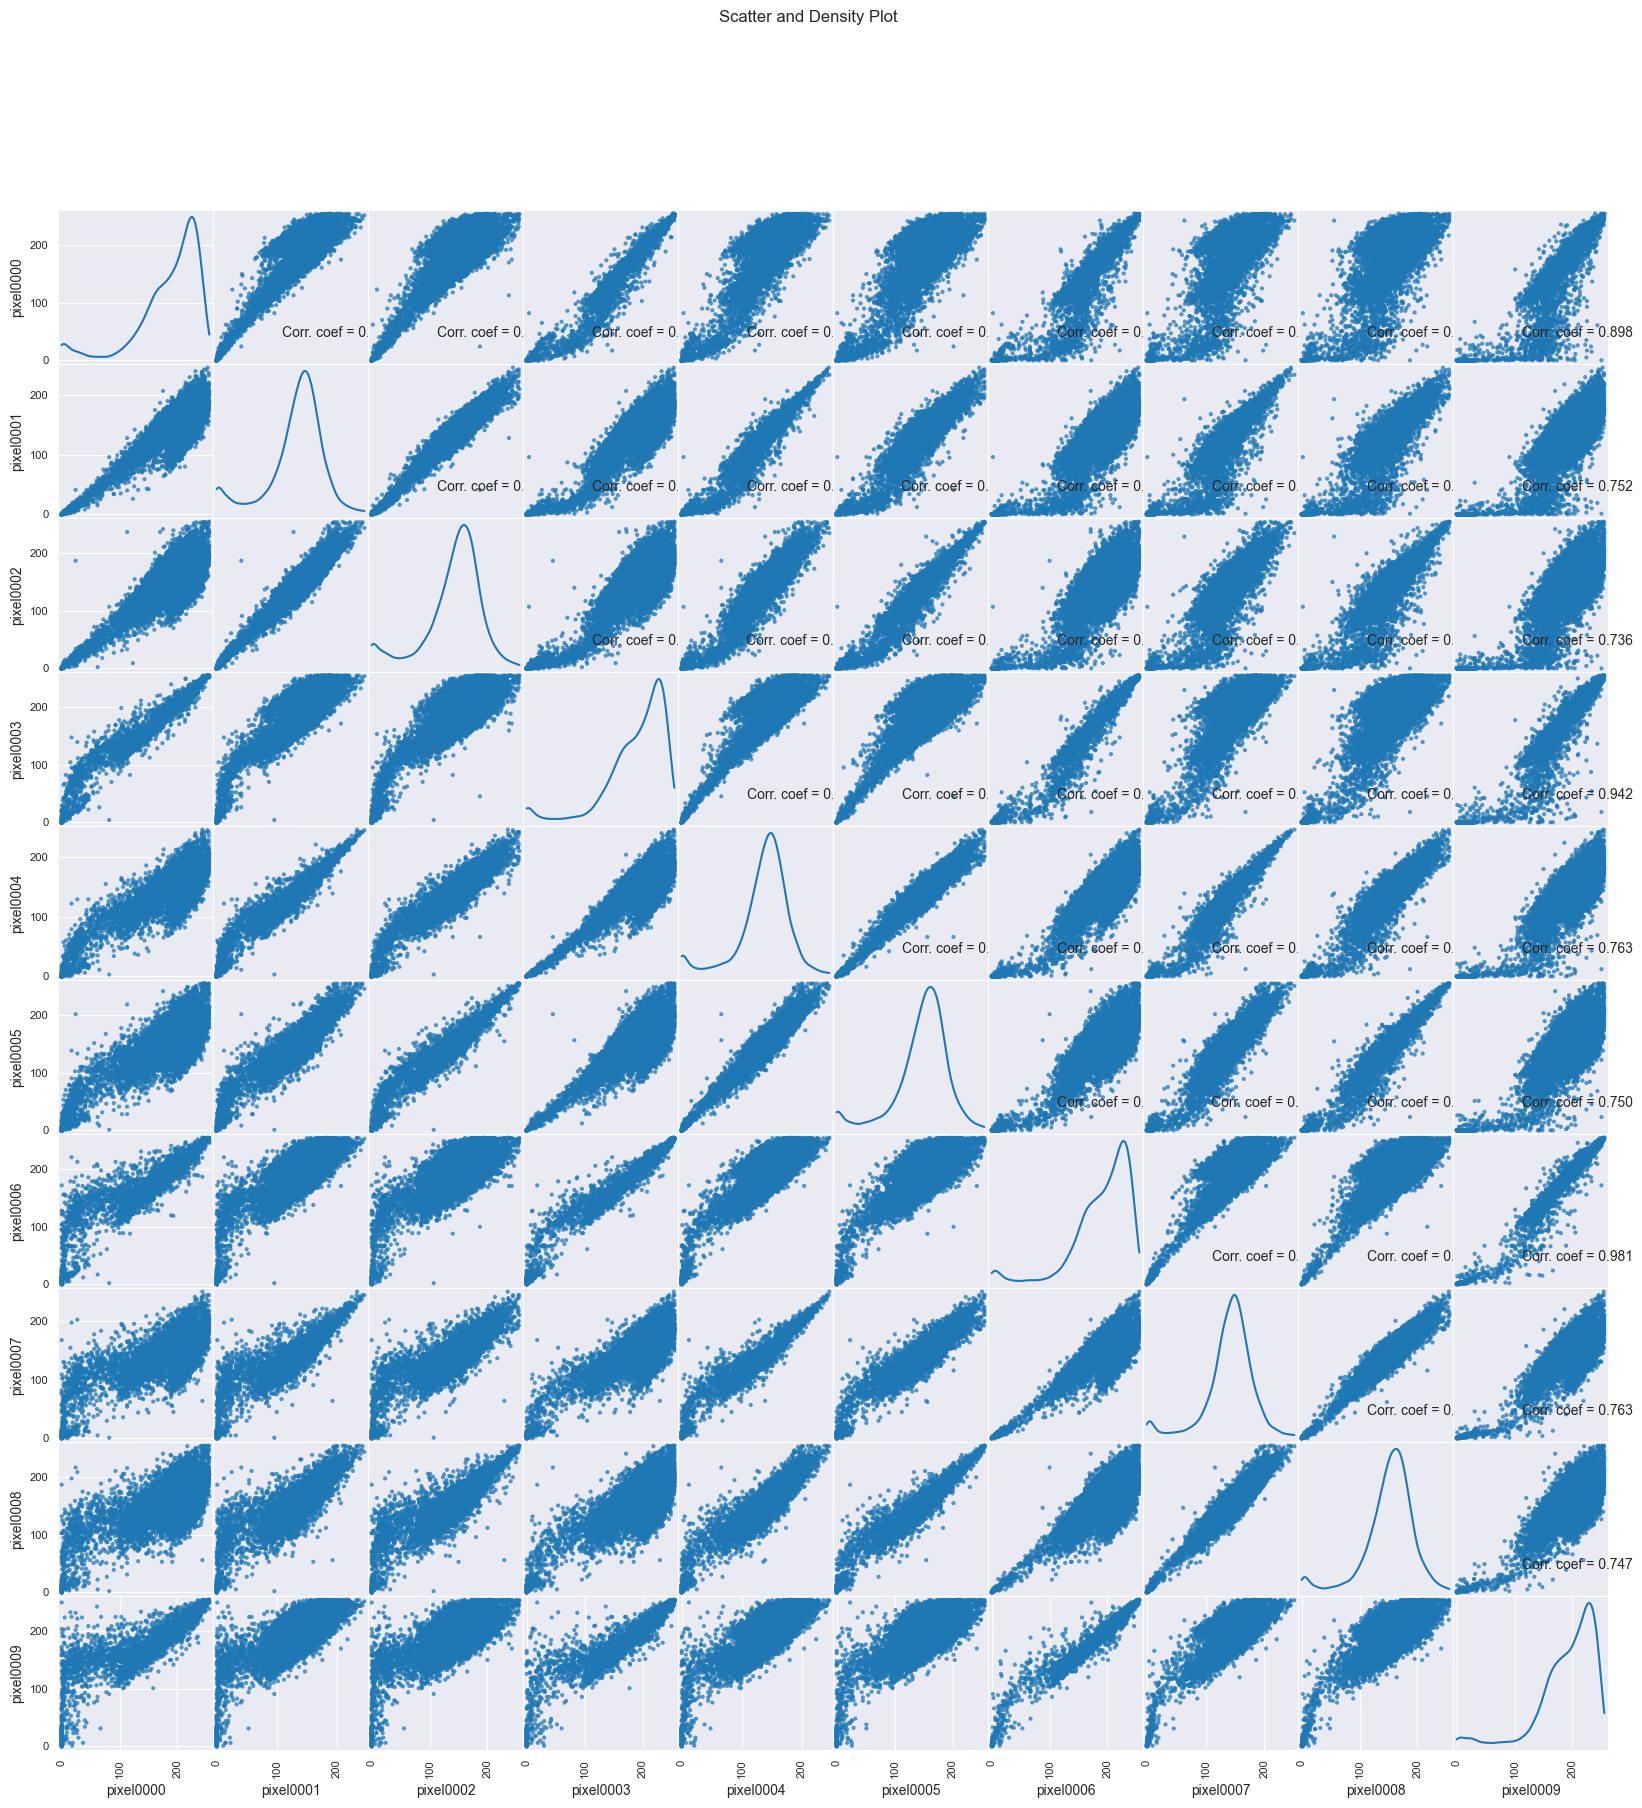

In [10]:
plotScatterMatrix(df, 20, 10)

In [11]:
X_train , X_test , y_train , y_test = train_test_split(data , label , test_size = 0.2 , random_state = 42)

In [12]:
def plotImg(img):
    plt.imshow(img)
    plt.title("Skin Cancer Image")
    plt.grid(False)
    plt.axis("off")
    plt.show()

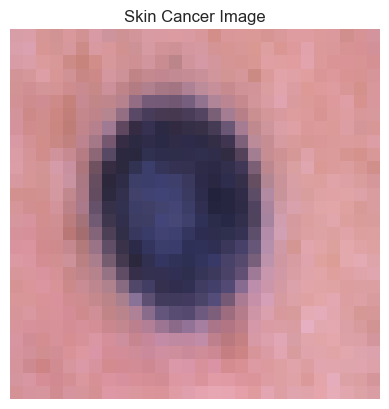

In [17]:
plotImg(X_train[0])

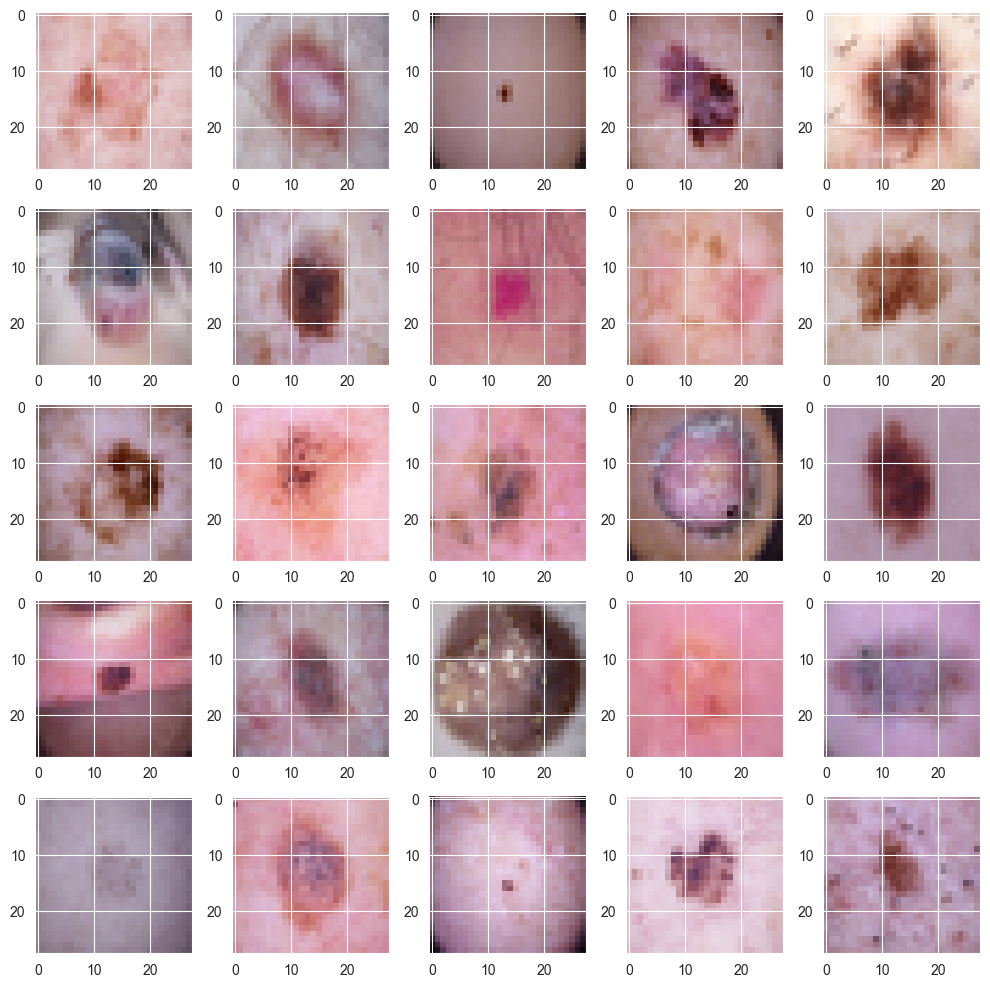

In [18]:
fig, axes = plt.subplots(5,5)
fig.set_size_inches(10, 10)
for i in range(5):
    for j in range(5):
        n = np.random.randint(0,1000, 1)
        axes[i,j].imshow(X_train[n].reshape(28,28,3))
    plt.tight_layout()

In [19]:
#one hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
# #Data Augmentation
# datagen = ImageDataGenerator(rescale=(1./255)
#                              ,rotation_range=10
#                              ,zoom_range = 0.1
#                              ,width_shift_range=0.1
#                              ,height_shift_range=0.1)
# testgen = ImageDataGenerator(rescale=(1./255))

In [20]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 5, verbose=1, factor=0.5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

In [22]:
#CNN Model
def model1():
    model = Sequential()
    #layer1
    model.add(Rescaling(1./255, input_shape=(28, 28, 3) ))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    #layer2
    model.add(Conv2D(32, (3, 3) , padding='same'))
    model.add(Activation('relu'))
    #layer3
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    #layer4
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #classfier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    return model
    
    
def model2():
    model = Sequential()
    #layer1
    model.add(Rescaling(1./255, input_shape=(28, 28, 3) ))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    #layer2
    model.add(Conv2D(32, (3, 3) , padding='same'))
    model.add(Activation('relu'))
    #layer3
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    #layer4
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    #classifier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(7))
    model.add(Activation('softmax'))
    
    return model
    
def model3():
    model = Sequential()
    #layer1
    model.add(Rescaling(1./255, input_shape=(28, 28, 3) ))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    #layer2
    model.add(Conv2D(32, (3, 3) , padding='same'))
    model.add(Activation('relu'))
    #layer3
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    #layer4
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # classifier
    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    return model
    
    
def model4():
    input_ = Input(shape = [28,28,3])
    layer1 = Conv2D(32 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(input_)
    pool1 = MaxPooling2D()(layer1)
    normal1 = BatchNormalization()(pool1)
    layer2 = Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(normal1)
    layer3 = Conv2D(64 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(layer2)
    pool2 = MaxPooling2D()(layer3)
    normal2 = BatchNormalization()(pool2)
    layer4 = Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(normal2)
    layer5 = Conv2D(128 , (3,3) , activation='relu',padding='same' , kernel_initializer='he_normal')(layer4)
    pool3 = MaxPooling2D()(layer5)
    normal3 = BatchNormalization()(pool3)
    layer6 = Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(normal3)
    layer7 = Conv2D(256 , (3,3) , activation='relu' ,padding='same', kernel_initializer='he_normal')(layer6)
    pool4 = MaxPooling2D()(layer7)


    flatten  = Flatten()(pool4)
    dropout1 = Dropout(rate = 0.2)(flatten)
    dense1 = Dense(units = 256 , activation = 'relu' , kernel_initializer = 'he_normal')(dropout1)
    normal4 = BatchNormalization()(dense1)
    dense2 = Dense(units = 128 , activation = 'relu' , kernel_initializer = 'he_normal')(normal4)
    normal5 = BatchNormalization()(dense2)
    dense3 = Dense(units = 64 , activation = 'relu' , kernel_initializer = 'he_normal')(normal5)
    normal6 = BatchNormalization()(dense3) 
    dense4 = Dense(units = 32 , activation = 'relu' , kernel_initializer = 'he_normal' , kernel_regularizer=keras.regularizers.L1L2())(normal6)
    normal7 = BatchNormalization()(dense4) 
    dense5 = Dense(units = 7 , activation='softmax' ,kernel_initializer="glorot_uniform" , name = 'classifier')(normal7)

    return Model(inputs = input_ ,outputs = dense5)

In [23]:
model_1 = model1()
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_2 (Activation)   (None, 28, 28, 64)        0

In [24]:
model_2 = model2()
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 28, 28, 64)       

In [25]:
model_3 = model3()
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 activation_14 (Activation)  (None, 28, 28, 64)       

In [26]:
model_4 = model4()
model_4.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 3)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 14, 14, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 64)        36928 

In [22]:
#plotting model
# keras.utils.plot_model(model)

In [27]:
model_1.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])
model_2.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])
model_3.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])
model_4.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])

In [28]:
#Training
print("Training Model 1 Started...")
history1 = model_1.fit(X_train ,y_train ,epochs=20 ,batch_size=128,validation_data=(X_test , y_test) ,callbacks=[learning_rate_reduction, early_stopping])
print("Training Model 1 Completed...")
print("Training Model 2 Started...")
history2 = model_2.fit(X_train ,y_train ,epochs=20 ,batch_size=128,validation_data=(X_test , y_test) ,callbacks=[learning_rate_reduction, early_stopping])
print("Training Model 2 Completed...")
print("Training Model 3 Started...")
history3 = model_3.fit(X_train ,y_train ,epochs=20 ,batch_size=128,validation_data=(X_test , y_test) ,callbacks=[learning_rate_reduction, early_stopping])
print("Training Model 3 Completed...")
print("Training Model 4 Started...")
history4 = model_4.fit(X_train ,y_train ,epochs=20 ,batch_size=128,validation_data=(X_test , y_test) ,callbacks=[learning_rate_reduction, early_stopping])
print("Training Model 4 Completed...")

Training Model 1 Started...
Epoch 1/20
294/294 [==============================] - 141s 475ms/step - loss: 1.1548 - accuracy: 0.5525 - val_loss: 0.8037 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 2/20
294/294 [==============================] - 139s 473ms/step - loss: 0.5502 - accuracy: 0.8019 - val_loss: 0.3784 - val_accuracy: 0.8688 - lr: 0.0010
Epoch 3/20
294/294 [==============================] - 140s 476ms/step - loss: 0.2959 - accuracy: 0.8951 - val_loss: 0.2065 - val_accuracy: 0.9292 - lr: 0.0010
Epoch 4/20
294/294 [==============================] - 137s 464ms/step - loss: 0.1864 - accuracy: 0.9334 - val_loss: 0.1446 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 5/20
294/294 [==============================] - 136s 462ms/step - loss: 0.1214 - accuracy: 0.9568 - val_loss: 0.1112 - val_accuracy: 0.9623 - lr: 0.0010
Epoch 6/20
294/294 [==============================] - 136s 462ms/step - loss: 0.1091 - accuracy: 0.9613 - val_loss: 0.1185 - val_accuracy: 0.9595 - lr: 0.0010
Epoch 7/20
294/294

In [29]:
#testing
model_1.evaluate(X_test , y_test)
model_2.evaluate(X_test , y_test)
model_3.evaluate(X_test , y_test)
model_4.evaluate(X_test , y_test)

294/294 [==============================] - 3s 12ms/step - loss: 0.4102 - accuracy: 0.8930


[0.41020509600639343, 0.893043577671051]

In [30]:
#training acc vs testing acc graph
def plot(history, model_name, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, 'ro-',label='Training Accuracy', )
    plt.plot(epochs_range, val_acc, 'go-', label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'Training and Validation Accuracy {model_name}')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, 'ro-', label='Training Loss')
    plt.plot(epochs_range, val_loss, 'go-', label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'Training and Validation Loss {model_name}')
    plt.show()

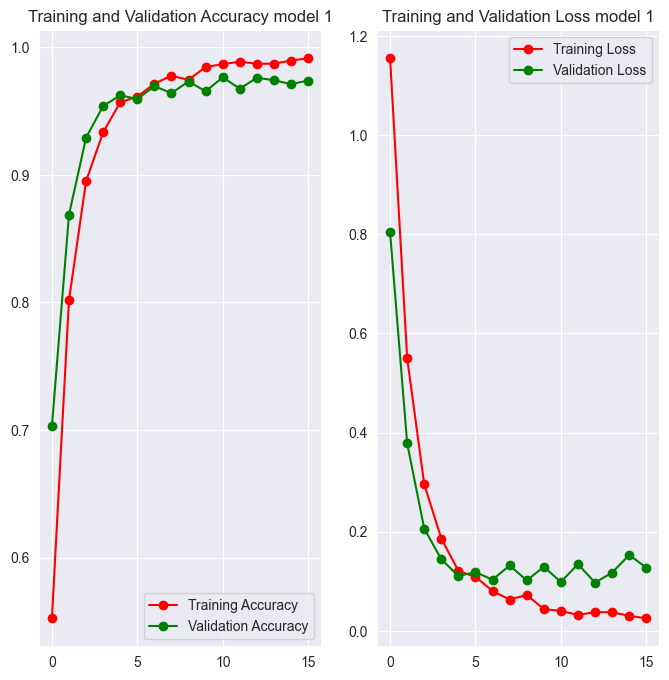

In [31]:
plot(history1, 'model 1', epochs = len(history1.history['loss']))

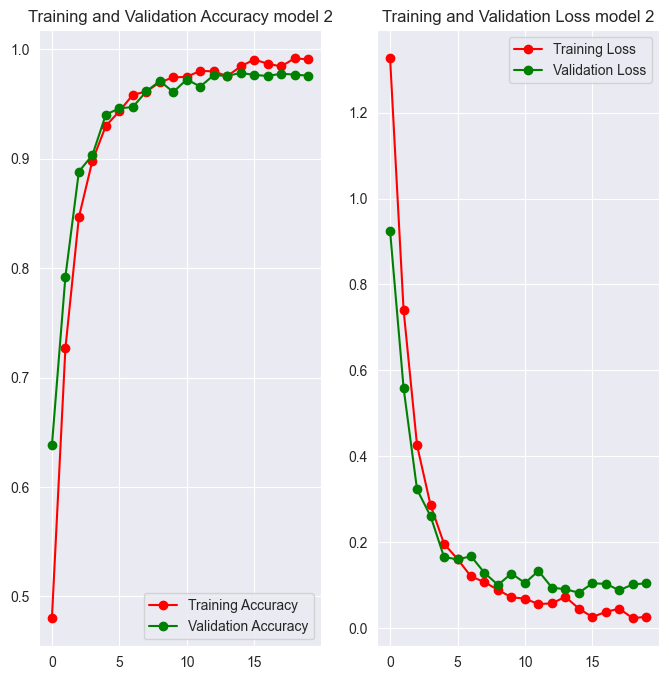

In [32]:
plot(history2, 'model 2', epochs = len(history2.history['loss']))

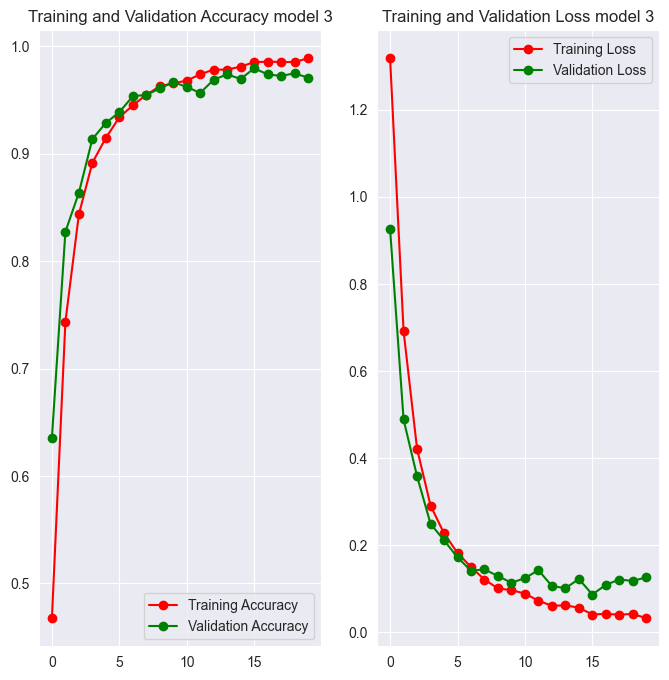

In [33]:
plot(history3, 'model 3', epochs = len(history3.history['loss']))

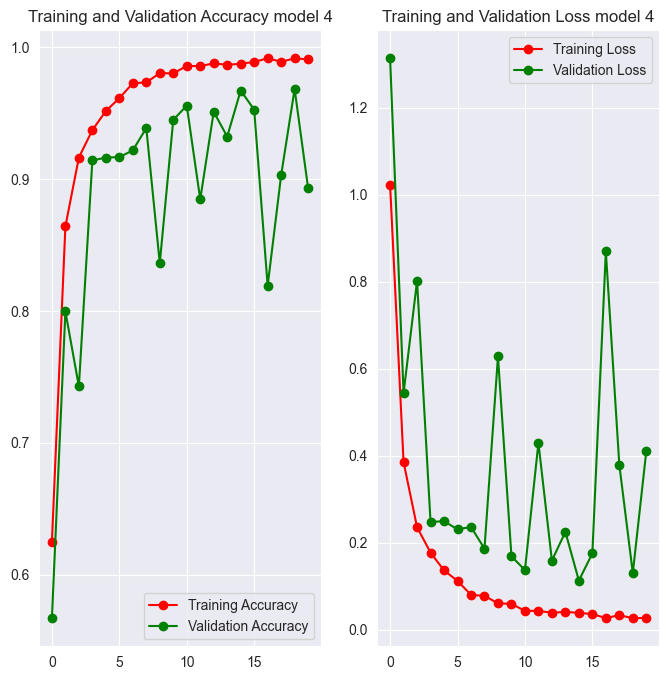

In [34]:
plot(history4, 'model 4', epochs = len(history4.history['loss']))

In [35]:
#hence model 1 is performing best, so we will retrain our model for specific epochs to get the good accuracy
# we will train for 7 epochs
finalModel = model1()
finalModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 28, 28, 3)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 activation_19 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_20 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 activation_21 (Activation)  (None, 28, 28, 64)       

In [36]:
finalModel.compile(optimizer='adam' , loss = keras.losses.CategoricalCrossentropy() ,metrics = ['accuracy'])
print("Training Model 1 Started...")
history = finalModel.fit(X_train ,y_train ,epochs=7 ,batch_size=128,validation_data=(X_test , y_test) ,callbacks=[learning_rate_reduction, early_stopping])
print("Training Model 1 Completed...")

Training Model 1 Started...
Epoch 1/7
294/294 [==============================] - 134s 455ms/step - loss: 1.2191 - accuracy: 0.5284 - val_loss: 0.8025 - val_accuracy: 0.7103 - lr: 0.0010
Epoch 2/7
294/294 [==============================] - 132s 449ms/step - loss: 0.6211 - accuracy: 0.7726 - val_loss: 0.4776 - val_accuracy: 0.8254 - lr: 0.0010
Epoch 3/7
294/294 [==============================] - 133s 452ms/step - loss: 0.3506 - accuracy: 0.8740 - val_loss: 0.3369 - val_accuracy: 0.8824 - lr: 0.0010
Epoch 4/7
294/294 [==============================] - 132s 449ms/step - loss: 0.2298 - accuracy: 0.9175 - val_loss: 0.2064 - val_accuracy: 0.9334 - lr: 0.0010
Epoch 5/7
294/294 [==============================] - 133s 452ms/step - loss: 0.1657 - accuracy: 0.9406 - val_loss: 0.1631 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 6/7
294/294 [==============================] - 132s 451ms/step - loss: 0.1183 - accuracy: 0.9577 - val_loss: 0.1314 - val_accuracy: 0.9594 - lr: 0.0010
Epoch 7/7
294/294 [=====

In [37]:
finalModel.evaluate(X_test , y_test)
#predicting
y_pred  = finalModel.predict(X_test).round()

294/294 [==============================] - 4s 14ms/step


In [38]:
target_names = [f"{classes[i]}" for i in range(7)]
print(classification_report(y_test , y_pred , target_names =target_names ))

                                                               precision    recall  f1-score   support

('akiec', 'Actinic keratoses and intraepithelial carcinomae')       1.00      0.99      0.99      1295
                             ('bcc', ' basal cell carcinoma')       0.97      1.00      0.98      1323
                     ('bkl', 'benign keratosis-like lesions')       0.92      0.98      0.95      1351
                                     ('df', 'dermatofibroma')       1.00      1.00      1.00      1392
                                  ('nv', ' melanocytic nevi')       0.98      0.74      0.84      1346
              ('vasc', ' pyogenic granulomas and hemorrhage')       0.99      1.00      0.99      1292
                                          ('mel', 'melanoma')       0.89      0.97      0.93      1388

                                                    micro avg       0.96      0.95      0.96      9387
                                                    macro avg       0.9

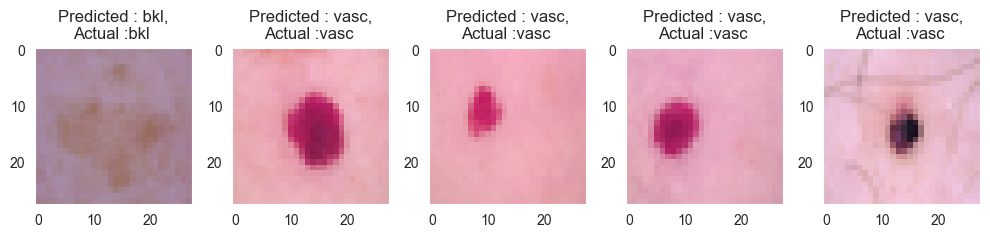

In [39]:
#visualizing prediction
correct = np.nonzero(y_pred == y_test)[1]
fig, axes = plt.subplots(1,5)
fig.set_size_inches(10, 10)
k = 0 
for c in correct[:5]:
    plt.subplot(2,5,k+1)
    plt.imshow(X_test[k].reshape(28,28,3) , interpolation='none')
    plt.title(f"Predicted : {classes[y_pred[k].argmax(axis = 0)][0]},\nActual :{classes[y_test[k].argmax(axis = 0)][0]} ")
    plt.tight_layout()
    plt.grid(False)
    k += 1

In [40]:
from tensorflow.keras.models import save_model

# Guardar el modelo
save_model(model_2, 'modelo2.h5')